In [1]:
import nltk
import matplotlib.pyplot as plt

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
nltk.data.path.append("/Users/carlos2/_pgms/IU_MSDS/NLPDL/nltk_data")
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### Searching text

In [4]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [5]:
# concordance shows every ocurrence of given word, together with some context
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [6]:
# similar shows what words appear in similar range of contexts
text1.similar("monstrous")

delightfully lazy impalpable candid vexatious pitiable exasperate wise
subtly curious determined imperial modifies fearless passing singular
perilous loving horrible gamesome


In [7]:
# in different texts, the context changes for the same word
text2.similar("monstrous")

very so heartily exceedingly good vast great amazingly sweet
remarkably as extremely a


In [8]:
# common_contexts finds contexts that are shared by 2+ words
text2.common_contexts(['monstrous','very'])

be_glad am_glad a_pretty a_lucky is_pretty


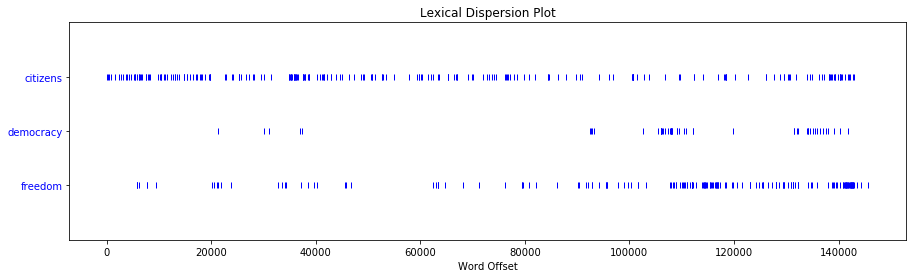

In [9]:
# dispersion plot shows where words appear in text
plt.figure(figsize=(15, 4))
text4.dispersion_plot(['citizens','democracy','freedom'])

In [10]:
# generating random text
text4.generate('citizens')

### Counting vocabulary

In [13]:
# number of words, punctuation, symbols...
len(text3)

44764

In [22]:
# sorted list of unique words, punctuation, symbols...
x = sorted(set(text3))
x[:10]

['!', "'", '(', ')', ',', ',)', '.', '.)', ':', ';']

In [23]:
# count of unique works, punctuation, symbols...
len(set(text3))

2789

In [24]:
# lexical richness
len(text3) / len(set(text3))

16.050197203298673

In [25]:
# how often does a word appear in a particular text?
print(text3.count("smote"))
100 * text4.count("a") / len(text4)

5


1.4643016433938312

### Computing language simple statistics

In [27]:
# creates frequency distribution dict like object with counts of word frequency in text
fdist1 = FreqDist(text1)
print(type(fdist1))
fdist1

<class 'nltk.probability.FreqDist'>


FreqDist({'prove': 13,
          'Walking': 1,
          'sleeps': 7,
          'repressed': 1,
          'dance': 4,
          'consulted': 1,
          'rehearse': 1,
          'tranquil': 4,
          'Beyond': 1,
          'match': 9,
          'cloths': 1,
          'precipice': 1,
          'greenhorn': 2,
          '--(': 4,
          'lightness': 1,
          'guides': 1,
          'strain': 12,
          'divinely': 2,
          'abroad': 6,
          'MANX': 3,
          'glories': 4,
          'Pott': 1,
          'announces': 1,
          'congenial': 5,
          'Tarsus': 1,
          'Mediterranean': 9,
          'paying': 3,
          'kings': 14,
          'providentially': 1,
          'exasperating': 2,
          'bowels': 12,
          'Sing': 5,
          'disentangling': 1,
          'clerical': 1,
          'knots': 3,
          'understanding': 4,
          'mayst': 1,
          'babies': 3,
          'featuring': 1,
          'traditional': 1,
          'CHIEF'

In [37]:
# manupulate FreqDist object like dict object with .keys(), .values() and .items()
for item in list(fdist1.items())[:10]: print(item)

('prove', 13)
('Littleton', 1)
('friendship', 2)
('cruised', 1)
('Tomahawk', 2)
('Consequently', 1)
('sleeps', 7)
('lists', 1)
('boozy', 1)
('Jinglers', 1)


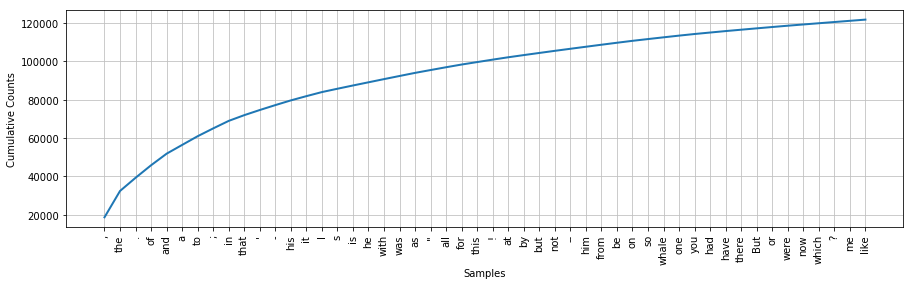

In [39]:
# very cool, you can plot FreqDist object
plt.figure(figsize=(15, 4))
fdist1.plot(50, cumulative=True)

### Problem: Find words in the 90% percentile of occurrences

In [71]:
import numpy as np
marker = np.percentile(list(fdist1.values()),90)
words = {x: 1 for x in fdist1.keys() if fdist1[x] >= marker}
print('90% percentile marker....................: {}'.format(marker))
print('Number of words in the 90% percentile....: {}'.format(len(words)))
print('Percentage of words in the 90% percentile: {}'.format(len(words)/len(fdist1)))

90% percentile marker....................: 11.0
Number of words in the 90% percentile....: 2090
Percentage of words in the 90% percentile: 0.1081948542734379


In [79]:
fdist1.N() == len(text1)

True